In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data source and description: https://www.kaggle.com/c/titanic/data

In [12]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [109]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [111]:
data.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [114]:
data[data['Sex'] == 'female'].count()

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            314
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin           97
Embarked       312
dtype: int64

1. Initial observations:

Total samples are 891. Survived value is a categorical feature with 0 (not survived) or 1 (survived) values. There are 3 Pclasses of tickets, described as 1,2,and 3. Age of passengers differs largely, from just 5 months to 80 years old, but 75% of passengers are younger than 35 years old. Most passengers did not travel with parents or children. Fares varied quite significantly, from 0 to 512 dollars, with 75 percent of passengers paying below 31 dollars. 

Names are unique across the dataset. There were 577 males on the passengers list and only 314 females. Some information about cabin numbers is missing. Passengers may have embarked Titanic in 3 ports, but most of them(644) embarked in port S. 

2. Data preparation:

<AxesSubplot:>

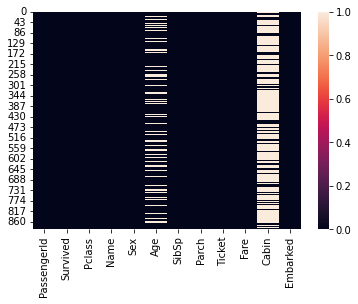

In [13]:
sns.heatmap(data.isnull())

In [21]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

<AxesSubplot:>

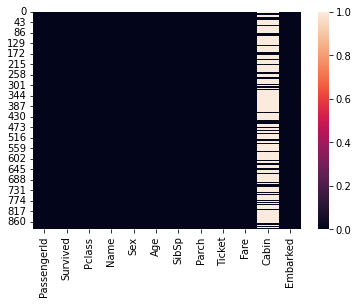

In [22]:
sns.heatmap(data.isnull())

3. Data analysis:

In [62]:
survived = data[data['Survived'] == 1].count()
total = data['PassengerId'].max()
survived_fraction = (survived/total * 100).round(2)
survived_fraction

PassengerId    38.38
Survived       38.38
Pclass         38.38
Name           38.38
Sex            38.38
Age            38.38
SibSp          38.38
Parch          38.38
Ticket         38.38
Fare           38.38
Cabin          15.26
Embarked       38.16
dtype: float64

In [120]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex'>

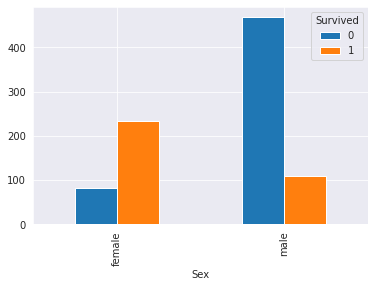

In [47]:
sex_vs_survived = data.pivot_table(values = 'PassengerId', index = 'Sex', columns = 'Survived', aggfunc = np.count_nonzero)
sex_vs_survived.plot.bar()

In [115]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass'>

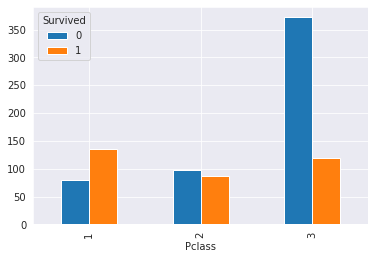

In [90]:
Pclass_vs_survived = data.pivot_table(values = 'PassengerId', index = 'Pclass', columns = 'Survived', aggfunc = np.count_nonzero)
Pclass_vs_survived.plot.bar()

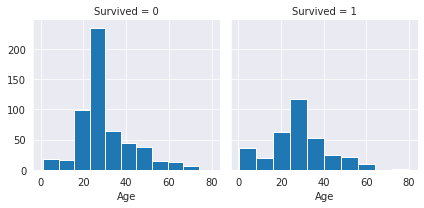

In [122]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

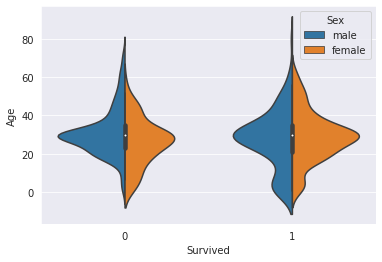

In [106]:
sns.violinplot(x = 'Survived', y = 'Age', data = data, hue = 'Sex', split = True)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

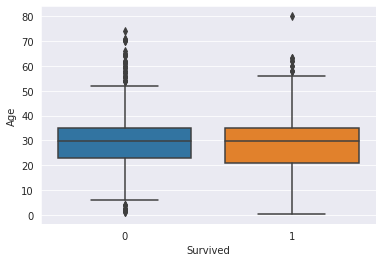

In [103]:
sns.boxplot(x = 'Survived', y= 'Age', data = data)

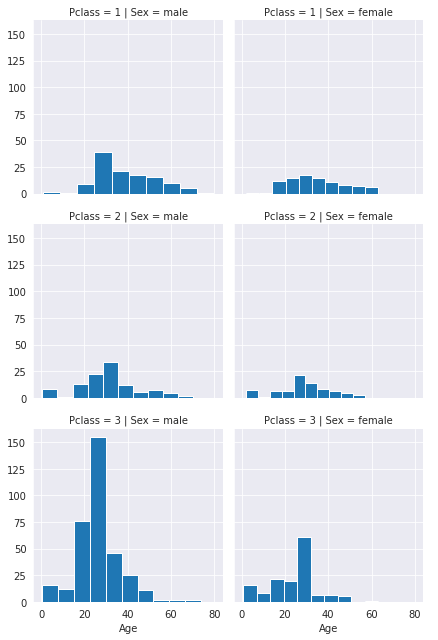

In [127]:
g = sns.FacetGrid(data, row = 'Pclass', col = 'Sex')
g.map(plt.hist, 'Age')
g.add_legend()

In [101]:
survived = data[data['Survived'] == 1]
survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.549778,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,13.772498,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,21.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,29.699118,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,35.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [102]:
not_survived = data[data['Survived'] == 0]
not_survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,549.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.415100,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,12.457370,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,23.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,29.699118,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,35.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


Conclusions: Analysis of different factors that impacted survival in the Titanic disaster revealed some intersting patterns. Only about 38% of passengers survived that event. Clearly women had higher chance to survive than men. Passengers in class 1 and 2 had much higher chance to survive than passengers in class 3. This can also be correlated to the fact that in class 3 most passengers were men in the age range: 20-30. The average age of survivors was around 28 years old, which is slightly lower than average age of victims: 30 years old. Remarkably, the oldest person who lived through the crash was 80 years old, and the youngest was the child of 5 months. 